## Imports

In [ ]:
!pip install prophet

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot
import numpy as np

In [313]:
from google.colab import drive
drive.mount("/content/drive/")
# Change the path if you want to run it (for Adrian PATH = '/content/drive/My Drive/')
PATH = '/content/drive/My Drive/'

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


## Preprocessing

In [314]:
world_events = pd.read_json(PATH + 'Hacklythics/data/apple_and_world_events.json')
world_events.head()

,reasoning,annotated_events
0,Events collected in time periods and merged ch...,"{'event_name': 'Mac Mini Launch', 'event_date'..."
1,Events collected in time periods and merged ch...,"{'event_name': 'iPod Shuffle Launch', 'event_d..."
2,Events collected in time periods and merged ch...,"{'event_name': 'YouTube Launch', 'event_date':..."
3,Events collected in time periods and merged ch...,"{'event_name': 'Mac OS X Tiger Release', 'even..."
4,Events collected in time periods and merged ch...,{'event_name': 'Intel Transition Announcement'...


In [315]:
print(world_events.shape)

(127, 2)


In [316]:
iphones_list = np.array(['Apple iPhone 1st 2G 4GB', 'Apple iPhone 1st 2G 8GB', 'Apple iPhone 1st 2G 16GB', 'Apple iPhone 3G 8GB', 'Apple iPhone 3G 16GB', 'Apple iPhone 3GS 8GB',
                         'Apple iPhone 3GS 16GB', 'Apple iPhone 3GS 32GB', 'Apple iPhone 4 8GB', 'Apple iPhone 4 16GB', 'Apple iPhone 4 32GB', 'Apple iPhone 4S 8GB',
                         'Apple iPhone 4S 16GB', 'Apple iPhone 4S 32GB', 'Apple iPhone 4S 64GB', 'Apple iPhone 5 16GB', 'Apple iPhone 5 32GB', 'Apple iPhone 5 64GB',
                         'Apple iPhone 5C 8GB', 'Apple iPhone 5C 16GB', 'Apple iPhone 5C 32GB', 'Apple iPhone 5S 16GB', 'Apple iPhone 5S 32GB', 'Apple iPhone 5S 64GB',
                         'Apple iPhone 6 16GB', 'Apple iPhone 6 32GB', 'Apple iPhone 6 64GB', 'Apple iPhone 6 128GB', 'Apple iPhone 6 Plus 16GB', 'Apple iPhone 6 Plus 32GB',
                         'Apple iPhone 6 Plus 64GB', 'Apple iPhone 6 Plus 128GB', 'Apple iPhone 6S 16GB', 'Apple iPhone 6S 32GB', 'Apple iPhone 6S 64GB', 'Apple iPhone 6S 128GB',
                         'Apple iPhone 6S Plus 16GB', 'Apple iPhone 6S Plus 32GB', 'Apple iPhone 6S Plus 64GB', 'Apple iPhone 6S Plus 128GB', 'Apple iPhone 7 32GB',
                         'Apple iPhone 7 64GB', 'Apple iPhone 7 128GB', 'Apple iPhone 7 256GB', 'Apple iPhone 7 Plus 32GB', 'Apple iPhone 7 Plus 128GB', 'Apple iPhone 7 Plus 256GB',
                         'Apple iPhone 8 64GB', 'Apple iPhone 8 128GB', 'Apple iPhone 8 256GB', 'Apple iPhone 8 Plus 64GB', 'Apple iPhone 8 Plus 128GB', 'Apple iPhone 8 Plus 256GB',
                         'Apple iPhone 11 64GB', 'Apple iPhone 11 128GB', 'Apple iPhone 11 256GB', 'Apple iPhone 11 Pro 64GB', 'Apple iPhone 11 Pro 256GB',
                         'Apple iPhone 11 Pro 512GB', 'Apple iPhone 11 Pro Max 64GB', 'Apple iPhone 11 Pro Max 256GB', 'Apple iPhone 11 Pro Max 512GB', 'Apple iPhone 12 64GB',
                         'Apple iPhone 12 128GB', 'Apple iPhone 12 256GB', 'Apple iPhone 12 mini 64GB', 'Apple iPhone 12 mini 128GB', 'Apple iPhone 12 mini 256GB',
                         'Apple iPhone 12 Pro 128GB', 'Apple iPhone 12 Pro 256GB', 'Apple iPhone 12 Pro 512GB', 'Apple iPhone 12 Pro Max 128GB', 'Apple iPhone 12 Pro Max 256GB',
                         'Apple iPhone 12 Pro Max 512GB', 'Apple iPhone SE 2016 16GB', 'Apple iPhone SE 2016 32GB', 'Apple iPhone SE 2016 64GB', 'Apple iPhone SE 2016 128GB',
                         'Apple iPhone SE 2020 64GB', 'Apple iPhone SE 2020 128GB', 'Apple iPhone SE 2020 256GB', 'Apple iPhone X 64GB', 'Apple iPhone X 256GB', 'Apple iPhone X 512GB',
                         'Apple iPhone XR 64GB', 'Apple iPhone XR 128GB', 'Apple iPhone XR 256GB', 'Apple iPhone XS 64GB', 'Apple iPhone XS 256GB', 'Apple iPhone XS 512GB',
                         'Apple iPhone XS MAX 64GB', 'Apple iPhone XS MAX 256GB', 'Apple iPhone XS MAX 512GB'])

In [317]:
df = pd.read_json(PATH + 'Hacklythics/data/price_history_new/' + iphones_list[-1] + '.json')
df = df.T.reset_index().rename(columns={'index': 'Date'})
df['Date'] = pd.to_datetime(df['Date'])
#df = df.drop(df.columns[-2:], axis=1)
df.head()

,Date,new,used
0,2020-01-21,675.0,NaN
1,2020-01-22,675.0,NaN
2,2020-01-23,675.0,NaN
3,2020-01-24,680.0,NaN
4,2020-01-25,675.0,NaN


In [318]:
print(df.shape)

(1683, 3)


<Axes: xlabel='ds'>

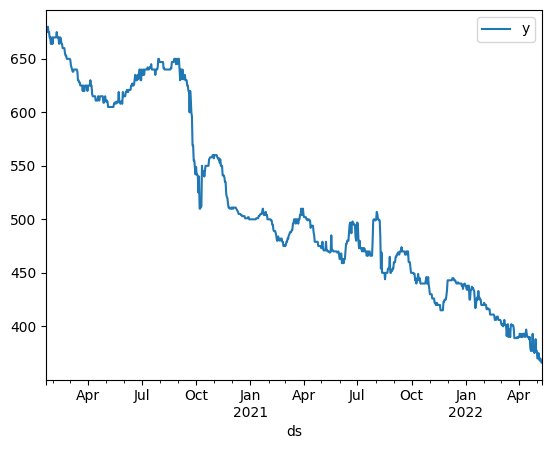

In [319]:
# This part will split the dataset into two different ones, and drop the null values (so that we have both new and used)
df_new = df[['Date', 'new']].dropna()
df_used = df[['Date', 'used']].dropna()
df_new.columns = ['ds', 'y']
df_used.columns = ['ds', 'y']
df_new.set_index('ds').plot()

<Axes: xlabel='ds'>

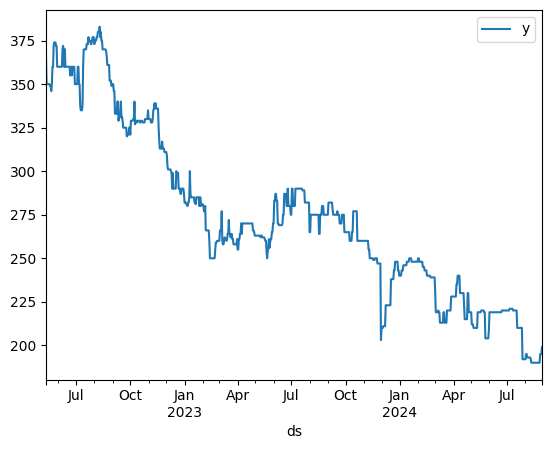

In [320]:
df_used.set_index('ds').plot()

In [321]:
# splitting into the train and test set
train_size = int(len(df_new) * 0.8)
df_new_train, df_new_test = df_new[:train_size], df_new[train_size:]
df_used_train, df_used_test = df_used[:train_size], df_used[train_size:]


## Prophet (new)

In [322]:
model_new = Prophet().fit(df_new_train)
# future_new = model_new.make_future_dataframe(61) # We can play around a bit with this number here (I think it should give us days)
# forecast_new = model_new.predict(future_new)
forecast_new = model_new.predict(df_new_test)
forecast_new.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslupse1a/r8ae3uxs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslupse1a/nij9z9o4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62694', 'data', 'file=/tmp/tmpslupse1a/r8ae3uxs.json', 'init=/tmp/tmpslupse1a/nij9z9o4.json', 'output', 'file=/tmp/tmpslupse1a/prophet_modelz7usdtdk/prophet_model-20250223105936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-23,426.506813,411.685664,440.201844,426.506813,426.506813,-0.110389,-0.110389,-0.110389,-0.110389,-0.110389,-0.110389,0.0,0.0,0.0,426.396424
1,2021-11-24,426.094358,412.786661,440.051743,426.094358,426.094358,0.079646,0.079646,0.079646,0.079646,0.079646,0.079646,0.0,0.0,0.0,426.174005
2,2021-11-25,425.681904,411.008068,438.030485,425.681904,425.681904,-0.191560,-0.191560,-0.191560,-0.191560,-0.191560,-0.191560,0.0,0.0,0.0,425.490344
3,2021-11-26,425.269449,410.929817,438.992551,425.269449,425.269449,-0.108217,-0.108217,-0.108217,-0.108217,-0.108217,-0.108217,0.0,0.0,0.0,425.161231
4,2021-11-27,424.856994,410.463996,438.950813,424.856994,424.863911,0.357653,0.357653,0.357653,0.357653,0.357653,0.357653,0.0,0.0,0.0,425.214647


In [323]:
# Accuracy calculation
#print("y: ", df_new_test['y'])
#print("yhat: ", forecast_new['yhat'])
#print((df_new_test['y'] - forecast_new['yhat']))
print("The model's accuracy for the selected iPhone model is: ", 100 - np.mean(np.abs((np.array(df_new_test['y']) - np.array(forecast_new['yhat'])) / np.array(df_new_test['y']))) * 100)

The model's accuracy for the selected iPhone model is:  95.23169304941375


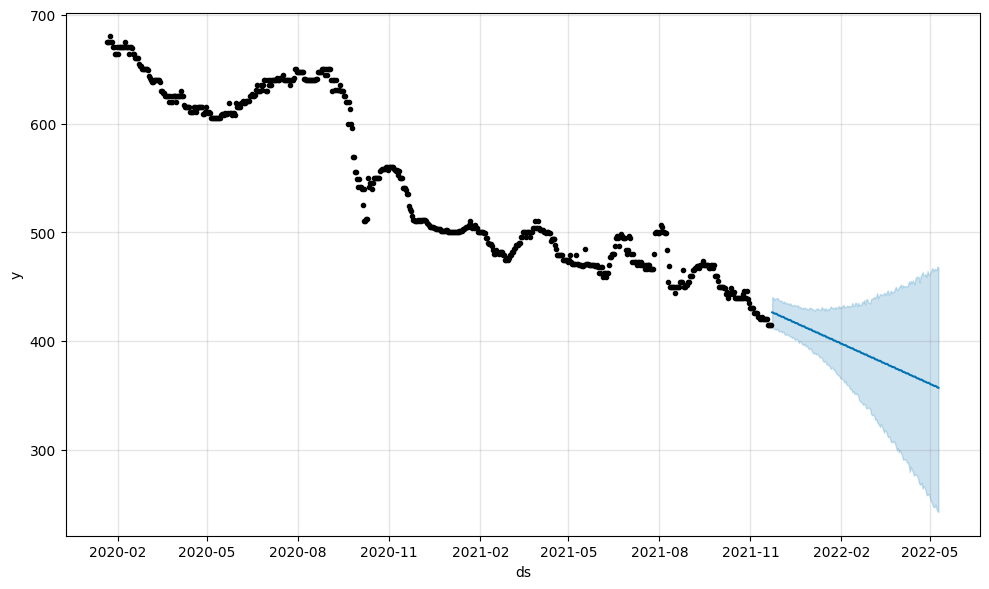

In [324]:
model_new.plot(forecast_new);

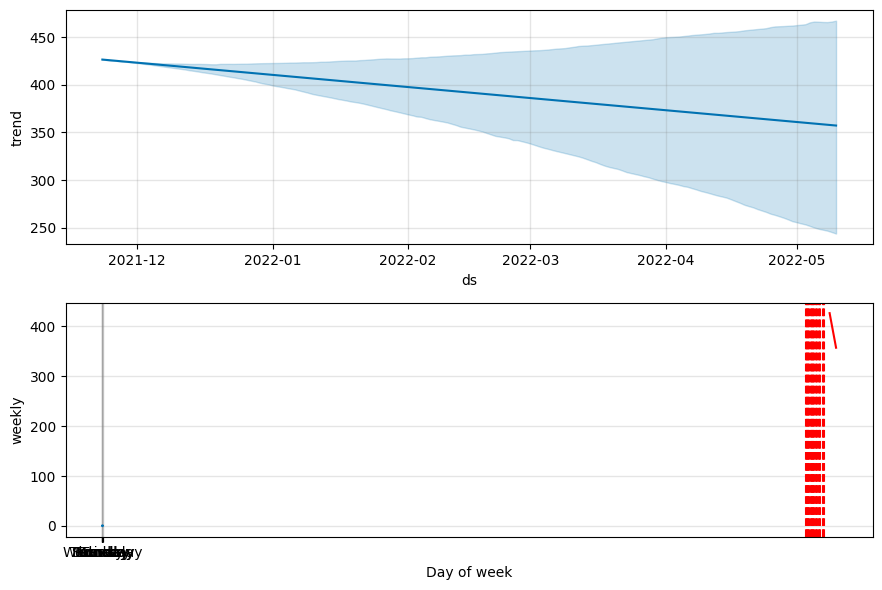

In [325]:
fig_new = model_new.plot_components(forecast_new)
add_changepoints_to_plot(fig_new.gca(), model_new, forecast_new);

In [326]:
model_new.changepoints

,ds
21,2020-02-11
43,2020-03-04
64,2020-03-25
86,2020-04-16
107,2020-05-07
129,2020-05-29
150,2020-06-19
172,2020-07-11
193,2020-08-01
214,2020-08-22


In [327]:
model_new.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

## Prophet (used)

In [328]:
model_used = Prophet().fit(df_used_train)
# future_used = model_used.make_future_dataframe(4) # We can play around a bit with this number here (I think it should give us days)
forecast_used = model_used.predict(df_used_test)
forecast_used.head()

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslupse1a/wfb7asg1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpslupse1a/bkb21nzs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52428', 'data', 'file=/tmp/tmpslupse1a/wfb7asg1.json', 'init=/tmp/tmpslupse1a/bkb21nzs.json', 'output', 'file=/tmp/tmpslupse1a/prophet_modelb4i3s8ea/prophet_model-20250223105956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:59:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:59:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2024-03-13,228.149335,216.133779,241.178253,228.149335,228.149335,0.592730,0.592730,0.592730,0.592730,0.592730,0.592730,0.0,0.0,0.0,228.742065
1,2024-03-14,227.937582,215.249566,240.700944,227.937582,227.937582,0.082802,0.082802,0.082802,0.082802,0.082802,0.082802,0.0,0.0,0.0,228.020384
2,2024-03-15,227.725830,215.552190,239.950337,227.725830,227.725830,0.072784,0.072784,0.072784,0.072784,0.072784,0.072784,0.0,0.0,0.0,227.798614
3,2024-03-16,227.514077,213.402355,239.361605,227.514077,227.514077,-0.406748,-0.406748,-0.406748,-0.406748,-0.406748,-0.406748,0.0,0.0,0.0,227.107329
4,2024-03-17,227.302325,214.338086,239.780041,227.302325,227.302325,0.125138,0.125138,0.125138,0.125138,0.125138,0.125138,0.0,0.0,0.0,227.427462


In [329]:
# Accuracy calculation
print("The model's accuracy for the selected iPhone model is: ", 100 - np.mean(np.abs((np.array(df_used_test['y']) - np.array(forecast_used['yhat'])) / np.array(df_used_test['y']))) * 100)

The model's accuracy for the selected iPhone model is:  96.08240320739836


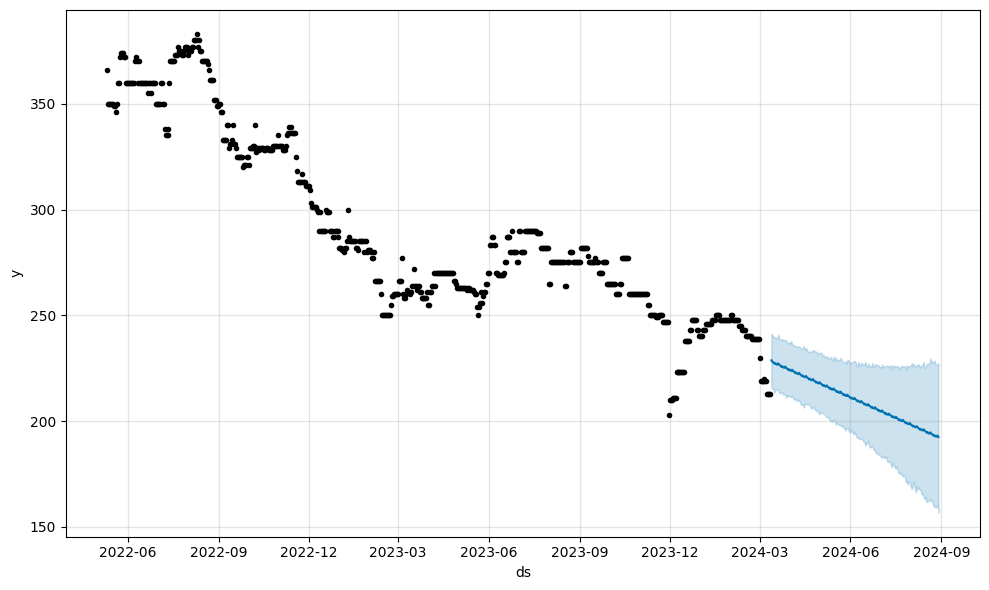

In [330]:
model_used.plot(forecast_used);

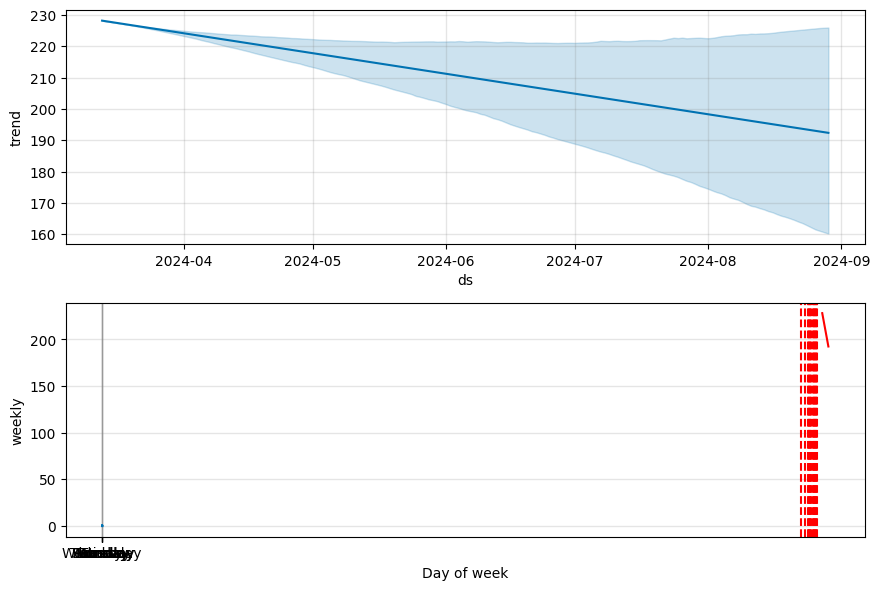

In [331]:
fig_used = model_used.plot_components(forecast_used);
add_changepoints_to_plot(fig_used.gca(), model_used, forecast_used);

In [332]:
model_used.changepoints

,ds
21,2022-06-01
43,2022-06-23
64,2022-07-14
86,2022-08-05
107,2022-08-26
129,2022-09-17
150,2022-10-08
172,2022-10-30
193,2022-11-20
214,2022-12-11


In [333]:
model_used.seasonalities

OrderedDict([('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])